In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

In [3]:
gantt_chart = pd.read_csv('gantt_chart.csv', parse_dates=['start', 'end'], dayfirst=True)
gantt_chart

,task,stage,start,end,completion
0,Literature Review,Project Proposal,2021-07-01,2021-08-31,1.0
1,Defining aims and objectives,Project Proposal,2021-08-20,2021-08-31,1.0
2,EDA,Project Proposal,2021-06-01,2021-06-10,1.0
3,App development,Project Proposal,2021-06-10,2021-08-31,1.0
4,Simulation #1: run app,Project Proposal,2021-08-31,2021-09-08,1.0
5,Deliverable: Project Proposal (write-up & subm...,Project Proposal,2021-10-01,2021-10-31,1.0
6,Explore & fix results from simulation #1,Progress Report 1,2021-09-08,2021-11-08,0.5
7,Refine requirements (i.e. methodology),Progress Report 1,2021-10-31,2021-11-23,0.2
8,Deliverable: Progress Report 1,Progress Report 1,2021-11-23,2021-12-15,0.1
9,Simulation #2: run app based on new requirements,Progress Report 2,2021-12-27,2022-01-15,0.0


In [4]:
# project start date
proj_start = gantt_chart.start.min()
# number of days from project start to task start
gantt_chart['start_num'] = (gantt_chart.start-proj_start).dt.days
# number of days from project start to end of tasks
gantt_chart['end_num'] = (gantt_chart.end-proj_start).dt.days
# days between start and end of each task
gantt_chart['days_start_to_end'] = gantt_chart.end_num - gantt_chart.start_num

In [5]:
def color(row):
    c_dict = {'Project Proposal':'#E69646', 'Progress Report 1':'#34D05C', 'Progress Report 2':'#34D0C3', 'Research paper':'#3475D0'}#, 'IT':'#3475D0'} #E64646
    return c_dict[row['stage']]

gantt_chart['color'] = gantt_chart.apply(color, axis=1)

In [6]:
# days between start and current progression of each task
gantt_chart['current_num'] = (gantt_chart.days_start_to_end * gantt_chart.completion)
gantt_chart.current_num = gantt_chart.current_num.abs()

In [7]:
key_dates = gantt_chart.loc[[5,8,11,14]]
key_dates

,task,stage,start,end,completion,start_num,end_num,days_start_to_end,color,current_num
5,Deliverable: Project Proposal (write-up & subm...,Project Proposal,2021-10-01,2021-10-31,1.0,122,152,30,#E69646,30.0
8,Deliverable: Progress Report 1,Progress Report 1,2021-11-23,2021-12-15,0.1,175,197,22,#34D05C,2.2
11,Deliverable: Progress Report 2 (write-up & sub...,Progress Report 2,2022-01-31,2022-02-28,0.0,244,272,28,#34D0C3,0.0
14,"Deliverable: Research Paper (write up, prof-re...",Research paper,2022-03-19,2022-04-30,0.0,291,333,42,#3475D0,0.0


In [8]:
colours = ['#E69646', '#34D05C', '#34D0C3', '#3475D0']

/var/folders/57/vx_c6srd2xz8x2jrl0lgyxbc0000gn/T/ipykernel_94179/2915993333.py:28: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  xticks = pd.concat([gantt_chart.start_num, gantt_chart.end_num], 0).sort_values()
/var/folders/57/vx_c6srd2xz8x2jrl0lgyxbc0000gn/T/ipykernel_94179/2915993333.py:31: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  xticks_labels = pd.concat([gantt_chart.start, gantt_chart.end], 0).sort_values().apply(lambda x: x.strftime("%d %B %y"))
No handles with labels found to put in legend.


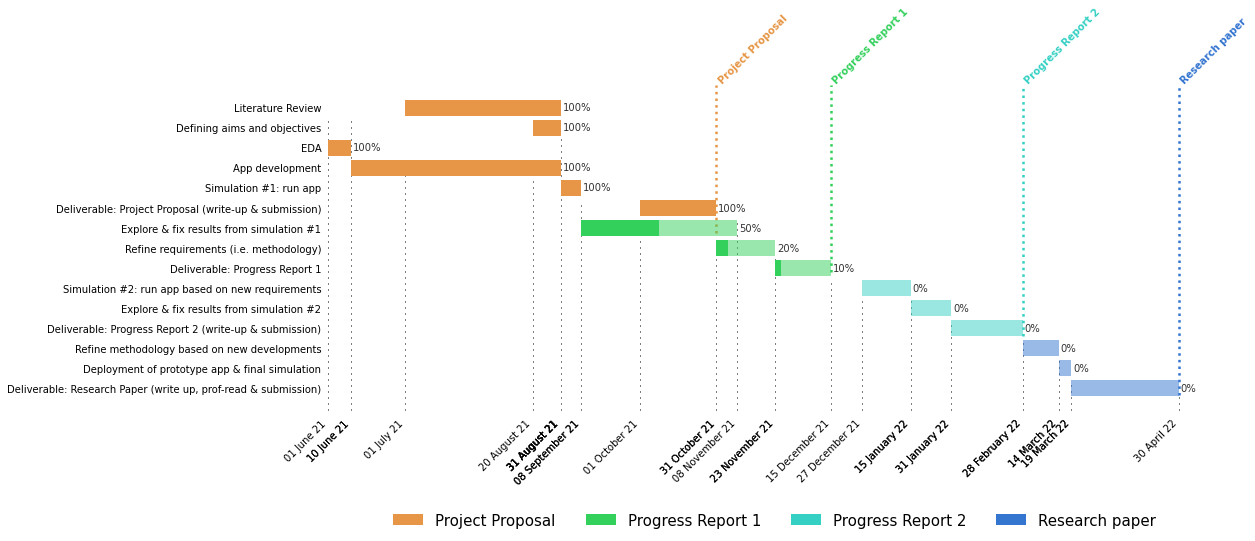

In [9]:
stages_index_position = [5, 8, 11, 14]
stages_xticks = gantt_chart.loc[stages_index_position].end_num.tolist()

dates_height = [0.905, 0.905, 0, 0.773, 0.707, 0.8390000000000001, 0, 0, 0, 0.641, 0, 0.536, 0.536, 0, 0.5927, 0.465, 0, 0.4, 0.35, 0.35, 0, 0.280, 0, 0.221, 0, 0.16, 0, 0.09, 0, 0.05]

fig, ax = plt.subplots(1, figsize=(16,6))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# bars
ax.barh(gantt_chart.task, gantt_chart.current_num, left=gantt_chart.start_num, color=gantt_chart.color, zorder=3)
ax.barh(gantt_chart.task, gantt_chart.days_start_to_end, left=gantt_chart.start_num, color=gantt_chart.color, alpha=0.5, joinstyle='miter', zorder=2)
ax.invert_yaxis()

# texts
for idx, row in gantt_chart.iterrows():
    ax.text(row.end_num+0.75, idx, 
            f"{int(row.completion*100)}%", 
            va='center', alpha=0.8)

##### LEGENDS #####
c_dict = {'Project Proposal':'#E69646', 'Progress Report 1':'#34D05C', 'Progress Report 2':'#34D0C3', 'Research paper':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)

##### TICKS #####

xticks = pd.concat([gantt_chart.start_num, gantt_chart.end_num], 0).sort_values()
ax.set_xticks(xticks)

xticks_labels = pd.concat([gantt_chart.start, gantt_chart.end], 0).sort_values().apply(lambda x: x.strftime("%d %B %y"))
ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

[ax.axvline(x=i[0], ymax=i[1], linestyle=(5, (1, 5)), linewidth=1, color='black', zorder=1, alpha=1) for i in zip(xticks, dates_height)]
[ax.axvline(x=i[0][7], ymin=i[2], color=i[1], linestyle=':', linewidth=2.5, zorder=1) for i in zip(key_dates.itertuples(), colours, [0.545, 0.425, 0.23, 0.05])]
[ax.text(i[0][7], -1.2, str(i[0][2]), weight="bold", rotation=45, color=i[1]) for i in zip(key_dates.itertuples(), colours)]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

lg = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

leg = plt.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), fancybox=False, shadow=False, prop={'size': 15}, facecolor='white')
leg.get_frame().set_linewidth(0.0)